100%|██████████| 1756/1756 [00:00<00:00, 170632.88it/s]
/Users/andrew/github/trading-strategies/ddd-southwest/common_functions.py:175: UserWarning: Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.
  backtest = Backtest(data, MacdStrategy, cash=cash, margin=1/30, commission=0.00)


number of trades: 37


/Users/andrew/.pyenv/versions/3.11.4/lib/python3.11/site-packages/backtesting/backtesting.py:1375: UserWarning: For multiprocessing support in `Backtest.optimize()` set multiprocessing start method to 'fork'.
  warnings.warn("For multiprocessing support in `Backtest.optimize()` "


  0%|          | 0/8 [00:00<?, ?it/s]

Start                                     0.0
End                                    1755.0
Duration                               1755.0
Exposure Time [%]                   28.189066
Equity Final [$]                  29782.39064
Equity Peak [$]                   30329.18472
Return [%]                          19.129563
Buy & Hold Return [%]               26.184365
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -8.502298
Avg. Drawdown [%]                   -1.889734
Max. Drawdown Duration                  317.0
Avg. Drawdown Duration              45.807692
# Trades                                 30.0
Win Rate [%]                        36.666667
Best Trade [%]                       4.066463
Worst Trade [%]                      -1.33146
Avg. Trade [%]                    

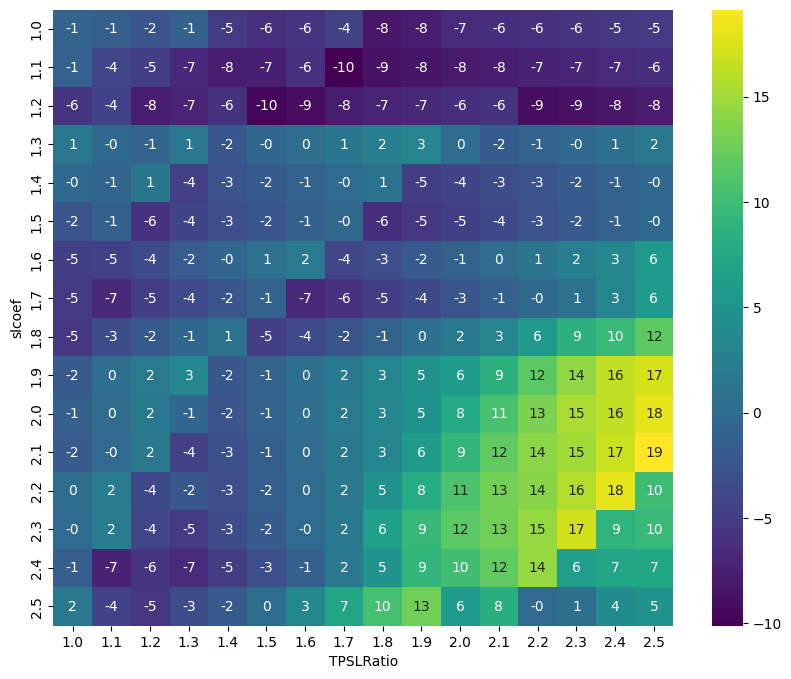

In [1]:
# Nasdaq index, 1 year period 1 hour interval
# Use MACD and ADX to generate trade signals

import common_functions as cf
import common_trade_signals as cts

tradingData = cf.read_data('^ixic', '1y', '1h')
cf.set_indicators(tradingData, 200)
cf.set_trade_signals(tradingData, cts.total_macd_adx_trade_signal)
stats, heatmap = cf.backtest_trading(tradingData, 25000)

print(stats)
cf.show_heatmap(heatmap)


In [2]:
# All indices, 1 year period 1 hour interval
# Use MACD and ADX to generate trade signals

import pandas as pd

indices = ['^ixic', '^GSPC', '^DJI', '^NYA', '^BUK100P',
           '^RUT', '^VIX', '^FTSE', '^N225', '^HSI', '^GDAXI', '^FCHI']
return_stats = pd.DataFrame(
    columns=['Index', 'Buy & Hold Return [%]', 'Return [%]'])

for index in indices:
    tradingData = cf.read_data(index, '1y', '1h')
    cf.set_indicators(tradingData, 200)
    cf.set_trade_signals(tradingData, cts.total_macd_adx_trade_signal)
    stats, heatmap = cf.backtest_trading(tradingData, 25000)

    return_stats = pd.concat([
        return_stats,
        pd.DataFrame([[index, stats.loc['Buy & Hold Return [%]'], stats.loc['Return [%]']]], columns=[
                     'Index', 'Buy & Hold Return [%]', 'Return [%]'])
    ], ignore_index=True)


return_stats

NameError: name 'pd' is not defined